In [4]:
import os
import numpy as np
from PIL import Image
import cv2
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import re

from Predictor import *

#default_path = 'C:/Users/paulz/Documents/CoronaryArteryDisease_v2'

#os.chdir(default_path)
os.chdir(os.path.join(os.getcwd(),'..'))
print(os.getcwd())

c:\Users\paulz\OneDrive\Dokumente\CoronaryArteryDisease_v2


In [5]:
#Alphanumerical sorting 
def natural_sort_key(s):
    return [int(text) if text.isdigit() else text.lower() for text in re.split(r'(\d+)', s)]

In [6]:
def evaluation(images_type,size):
    f1_list = []
    tp_list = []

    img_dir = os.path.join(os.getcwd(), 'Dataset', 'arcade', 'stenosis', 'test', 'images', 'img')
    img_files = sorted(os.listdir(img_dir), key=natural_sort_key)

    for name in img_files:
                                        #,'Dataset','arcade','stenosis','test','images','img')):
        true_mask_path = os.path.join(os.getcwd(),'Dataset','arcade','stenosis','test',images_type,'img',name)
        true_mask = img_to_array('masks',name,size)
        #print(true_mask)
        true_mask = np.where(true_mask>=0.5,1,true_mask)
        true_mask = np.where(true_mask<0.5,0,true_mask)
        
        pred_name = name[:-4] + '_pred.jpg'
        pred_mask = img_to_array('predictions_'+images_type,pred_name,size)
        pred_mask = np.where(pred_mask>=0.5,1,pred_mask)
        pred_mask = np.where(pred_mask<0.5,0,pred_mask)

        f1 = f1score(true_mask,pred_mask)
        f1_list.append(f1)
    f1_arr = np.array(f1_list)
    
    nan_mask = np.isnan(f1_arr)
    f1_arr[nan_mask] = 0
    
    
    return f1_arr

In [7]:
def f1score(y_true,y_pred):
    """
    computes f1 score between true and predicted masks
    """
    
    #compute true positive rate
    TP = np.sum(y_true*y_pred)
    #compute precision
    precision = TP/(np.sum(y_pred)+1e-7)

    #compute recall
    recall = TP/(np.sum(y_true)+1e-7)
    
    #compute f1 from precision and recall
    f1 = (2*precision*recall)/(precision+recall)

    return f1

In [8]:
size = (512,512)
f1_array_images = evaluation('images',size)

f1_array_kirsch = evaluation('images_kirsch',size)
f1_array_prewitt = evaluation('images_prewitt',size)
f1_array_sobel = evaluation('images_sobel',size)

C:\Users\paulz\AppData\Local\Temp\ipykernel_3388\1823143704.py:15: RuntimeWarning: invalid value encountered in scalar divide
  f1 = (2*precision*recall)/(precision+recall)


In [50]:
mean_f1_images = np.mean(f1_array_images)
print("Mean F1 Images:")
print(mean_f1_images)

mean_f1_kirsch = np.mean(f1_array_kirsch)
print("Mean F1 Kirsch:")
print(mean_f1_kirsch)

mean_f1_prewitt = np.mean(f1_array_prewitt)
print("Mean F1 Prewitt:")
print(mean_f1_prewitt)

mean_f1_sobel = np.mean(f1_array_sobel)
print("Mean F1 Sobel:")
print(mean_f1_sobel)

array_list = [f1_array_images,f1_array_kirsch,f1_array_prewitt,f1_array_sobel]
array_names = ['Standard','Kirsch','Prewitt','Sobel']

Mean F1 Images:
0.27845050961781465
Mean F1 Kirsch:
0.29458557493440174
Mean F1 Prewitt:
0.2531162193535607
Mean F1 Sobel:
0.2474583252468626


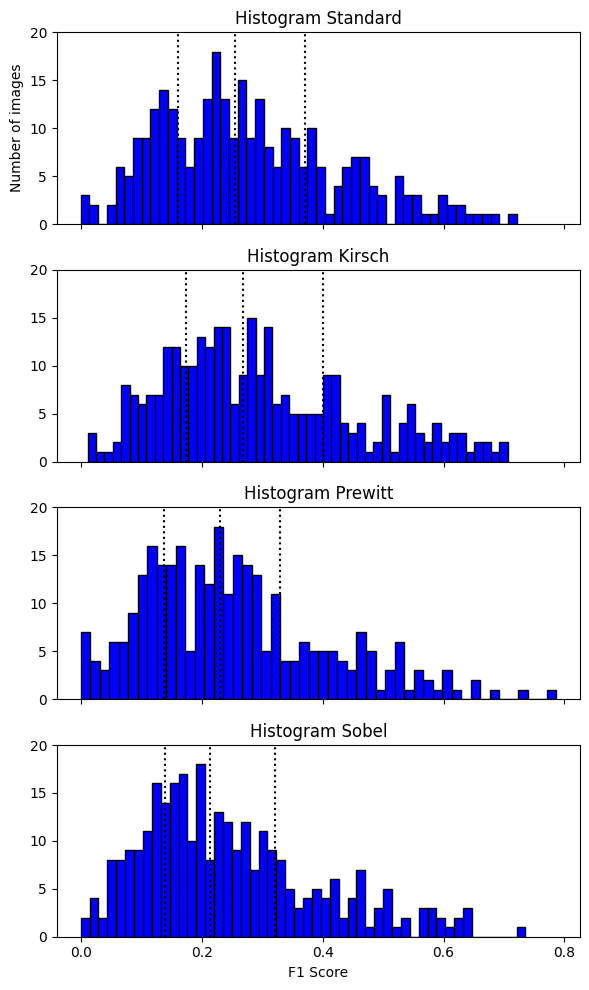

In [68]:
def histogram(array_list, names):
    fig, axs = plt.subplots(4, sharex=True, figsize=(6, 10))  # Erstellt vier Subplots mit einer gemeinsamen x-Achse

    axs[0].set_ylabel('Number of images')
    axs[3].set_xlabel('F1 Score')
    axs[0].set_xticks([0.0, 0.2, 0.4, 0.6, 0.8])

    for i in range(4):
        axs[i].hist(array_list[i], bins=50, color='blue', edgecolor='black')
        axs[i].set_title('Histogram ' + names[i])
        
        axs[i].set_yticks([0, 5, 10, 15, 20])

        # Berechne die 25., 50. und 75. Perzentile
        quartiles = np.percentile(array_list[i], [25, 50, 75])

        # Zeichne vertikale Linien für die Quartile
        for quartile in quartiles:
            axs[i].axvline(x=quartile, color='black', linestyle=':')

    plt.tight_layout()  # Für verbesserte Anordnung der Subplots
    plt.show()

histogram(array_list,array_names)

In [74]:
clusters = [1.27,8.15,7.33,8.24,10.47]
nonoverlaps = [0,5.89,5.07,5.99,8.21]

cluster_sizes = [2516,14069,11898,14596,16023]
nonoverlaps_sizes = [0,9467,5678,8844,9401]

([<matplotlib.axis.XTick at 0x2137378f5d0>,
 [Text(0, 0, 'Ground truth'),
  Text(1, 0, 'Standard'),
  Text(2, 0, 'Kirsch'),
  Text(3, 0, 'Prewitt'),
  Text(4, 0, 'Sobel')])

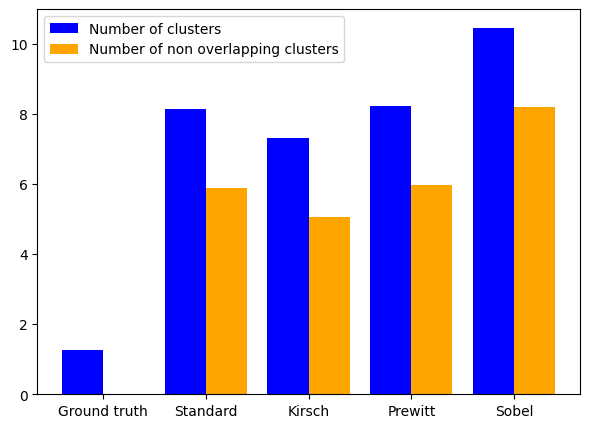

In [96]:
x = np.arange(5)
bar_names = ['Ground truth','Standard','Kirsch','Prewitt','Sobel']

fig = plt.figure(figsize=(7,5))
plt.bar(x-0.2,clusters,width=0.4,color='blue')
plt.bar(x+0.2,nonoverlaps,width=0.4,color='orange')


plt.legend(['Number of clusters','Number of non overlapping clusters'])
plt.xticks(x,bar_names)

([<matplotlib.axis.XTick at 0x2137603b490>,
 [Text(0, 0, 'Ground truth'),
  Text(1, 0, 'Standard'),
  Text(2, 0, 'Kirsch'),
  Text(3, 0, 'Prewitt'),
  Text(4, 0, 'Sobel')])

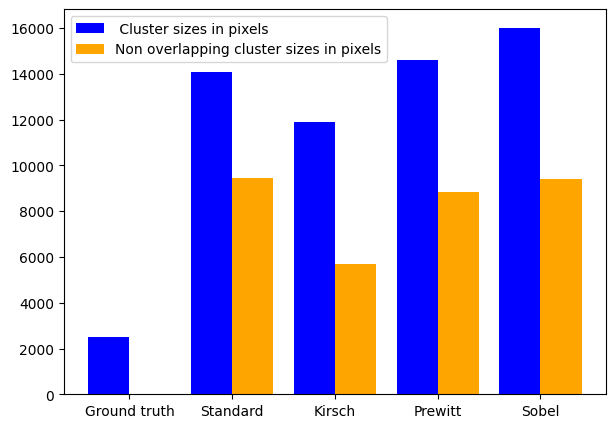

In [97]:
x = np.arange(5)
bar_names = ['Ground truth','Standard','Kirsch','Prewitt','Sobel']

fig = plt.figure(figsize=(7,5))
plt.bar(x-0.2,cluster_sizes,width=0.4,color='blue')
plt.bar(x+0.2,nonoverlaps_sizes,width=0.4,color='orange')


plt.legend([' Cluster sizes in pixels','Non overlapping cluster sizes in pixels'])
plt.xticks(x,bar_names)

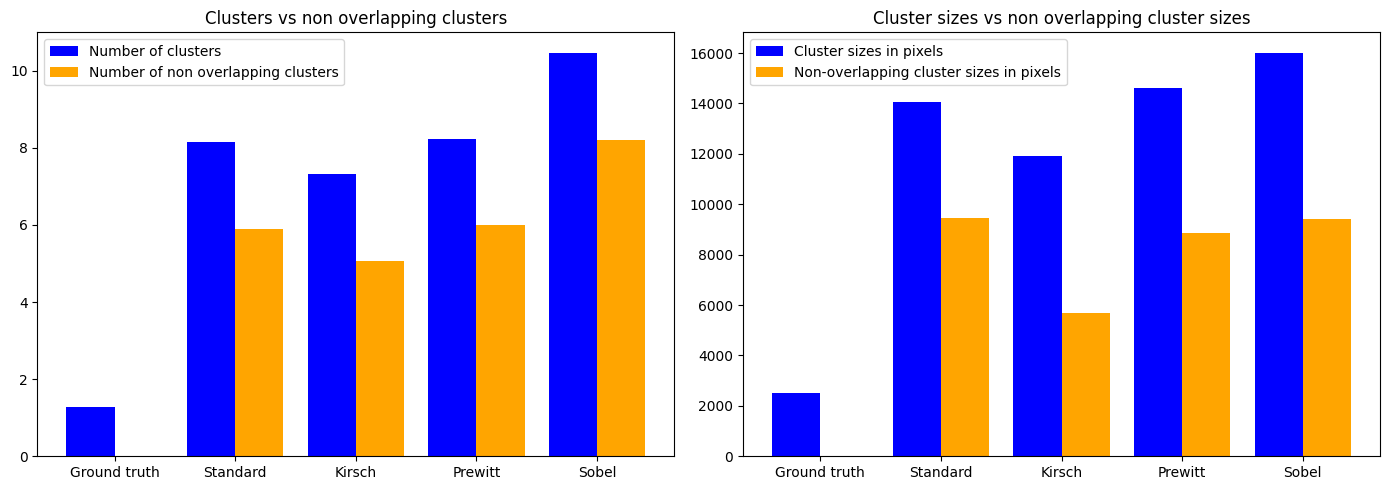

In [99]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plotting the first subplot
axes[0].bar(x-0.2, clusters, width=0.4, color='blue')
axes[0].bar(x+0.2, nonoverlaps, width=0.4, color='orange')
axes[0].legend(['Number of clusters','Number of non overlapping clusters'])
axes[0].set_xticks(x)
axes[0].set_xticklabels(bar_names)
axes[0].set_title('Clusters vs non overlapping clusters')

# Plotting the second subplot
axes[1].bar(x-0.2, cluster_sizes, width=0.4, color='blue')
axes[1].bar(x+0.2, nonoverlaps_sizes, width=0.4, color='orange')
axes[1].legend(['Cluster sizes in pixels','Non-overlapping cluster sizes in pixels'])
axes[1].set_xticks(x)
axes[1].set_xticklabels(bar_names)
axes[1].set_title('Cluster sizes vs non overlapping cluster sizes')

plt.tight_layout()
plt.show()